In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/fraij/Documents/Projet PFA/PS_20174392719_1491204439457_log.csv')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
del df['isFlaggedFraud']
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [4]:
print(df.shape)

(6362620, 10)


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
data = df.copy()
obJList = data.select_dtypes(include="object").columns
print(obJList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [7]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in obJList : 
    data[i] = label_encoder.fit_transform(data[i].astype(str))

data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0


In [8]:
# PAYMENT = 3
# TRANSFER = 4
# CASH_OUT = 1
# DEBIT = 2
# CASH_IN = 5

In [9]:
x = data.drop('isFraud', axis = 1 )
y = data['isFraud']

In [10]:
x.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0


In [11]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [12]:
# Recherche des valeurs manquantes dans la datasets
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [13]:
# Recherche des données dupliquées
dup = data.duplicated()
print(data[dup].shape)

(0, 10)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

#Implementation du modèle
extra_tree_forest =  ExtraTreesClassifier(n_estimators = 100,
                                        criterion ='entropy', max_features = 'sqrt')
# Entrainement du modèle
extra_tree_forest.fit(x, y)
 
# Extraction de l'importance des features
feature_importance = extra_tree_forest.feature_importances_

# Création d'un DataFrame pour visualiser les importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

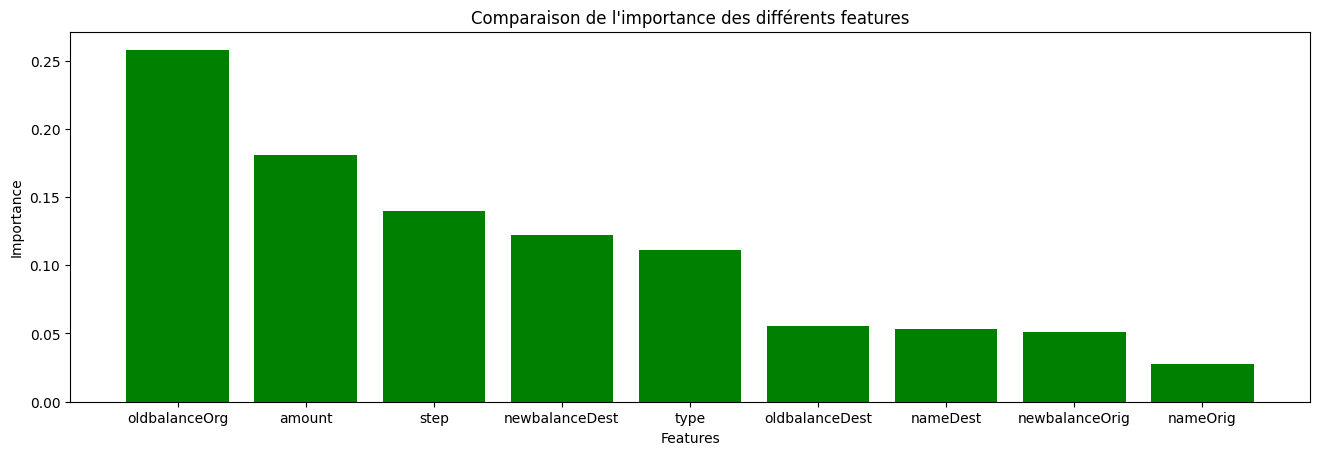

In [15]:
#Visualisation des resultats obtenus 
plt.figure().set_figwidth(16)
plt.bar(feature_importances['Feature'],feature_importances['Importance'], color="green")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title("Comparaison de l'importance des différents features")
plt.show()

<Axes: >

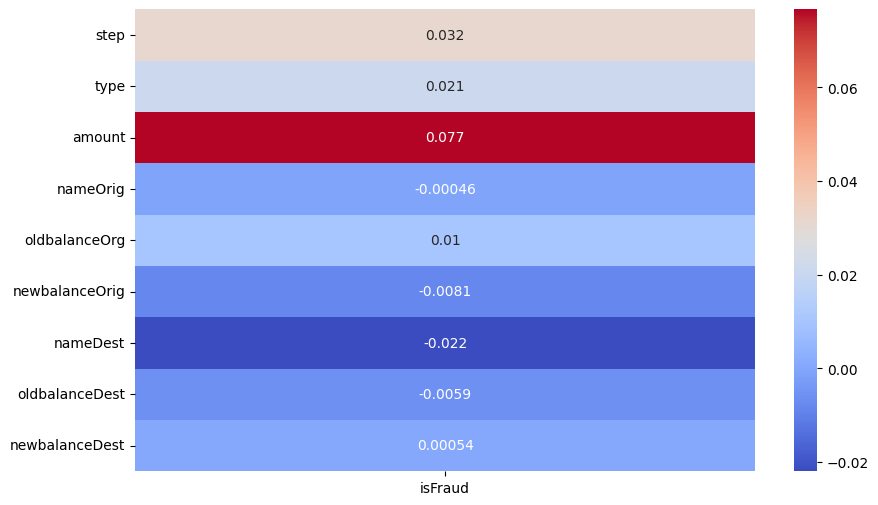

In [16]:
import seaborn as sns
corr = data.corr()
isFraud_corr = corr[['isFraud']].drop('isFraud')
plt.figure(figsize=(10,6))
sns.heatmap(isFraud_corr,annot=True,cmap='coolwarm')

In [17]:
data = data[['oldbalanceOrg','amount','step','newbalanceDest','type','isFraud']]

In [18]:
# Filtrer les lignes où 'isFraud' est 1
fraud_data = data.loc[df['isFraud'] == 1].reset_index(drop=True)
# Filtrer les lignes où 'isFraud' est 0
non_fraud_data = data.loc[data['isFraud'] == 0].reset_index(drop=True)

In [19]:
# Définition d'une fonction qui detecte les outliers
def detect_outliers(x):
    q1,q3=np.percentile(x.values, [25,75])
    lower_bound = (q1 - 1.5*(q3 - q1))
    upper_bound = (q3 + 1.5*(q3 - q1))
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    return outliers.index
    
out=detect_outliers(data['oldbalanceOrg'])
print(out)

Index([     14,      37,      38,      62,      63,     241,     242,     243,
           244,     245,
       ...
       6362606, 6362607, 6362612, 6362613, 6362614, 6362615, 6362616, 6362617,
       6362618, 6362619],
      dtype='int64', length=1112507)


In [20]:
outliers_indices = set()
for feature in data.columns:
    if feature != 'isFraud':  # Ignorer la colonne 'Class'
        outliers_indices.update(detect_outliers(data[feature]))

# Supprimer les lignes correspondantes aux outliers
data_cleaned = data.drop(index=outliers_indices).reset_index(drop=True)

# Combiner les données nettoyées où 'Class' est 1 avec les données où 'Class' est 0
data_final = pd.concat([data_cleaned, fraud_data]).reset_index(drop=True)

# Afficher les données finales
print(data_final)

         oldbalanceOrg      amount  step  newbalanceDest  type  isFraud
0            170136.00     9839.64     1            0.00     3        0
1             21249.00     1864.28     1            0.00     3        0
2               181.00      181.00     1            0.00     4        1
3               181.00      181.00     1            0.00     1        1
4             41554.00    11668.14     1            0.00     3        0
...                ...         ...   ...             ...   ...      ...
4447365      339682.13   339682.13   743       339682.13     1        1
4447366     6311409.28  6311409.28   743            0.00     4        1
4447367     6311409.28  6311409.28   743      6379898.11     1        1
4447368      850002.52   850002.52   743            0.00     4        1
4447369      850002.52   850002.52   743      7360101.63     1        1

[4447370 rows x 6 columns]


In [21]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_final['oldbalanceOrg'] = scaler.fit_transform(data_final['oldbalanceOrg'].values.reshape(-1,1))
data_final['amount'] = scaler.fit_transform(data_final['amount'].values.reshape(-1,1))
data_final['step'] = scaler.fit_transform(data_final['step'].values.reshape(-1,1))
data_final['newbalanceDest'] = scaler.fit_transform(data_final['newbalanceDest'].values.reshape(-1,1))
data_final['type'] = scaler.fit_transform(data_final['type'].values.reshape(-1,1))

data_final.head()

,oldbalanceOrg,amount,step,newbalanceDest,type,isFraud
0,0.768792,-0.543926,-1.793,-0.604226,0.889922,0
1,-0.077163,-0.591785,-1.793,-0.604226,0.889922,0
2,-0.196868,-0.601886,-1.793,-0.604226,1.718034,1
3,-0.196868,-0.601886,-1.793,-0.604226,-0.766302,1
4,0.038208,-0.532954,-1.793,-0.604226,0.889922,0


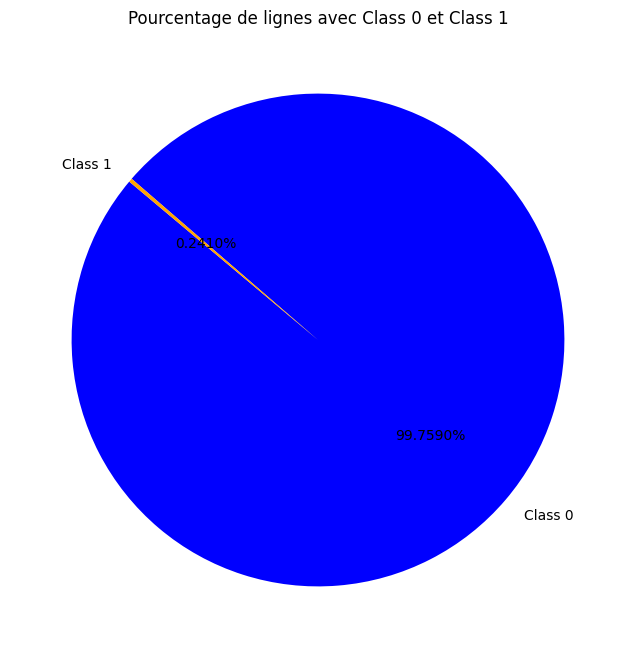

In [22]:
# Calculer le nombre de lignes pour chaque classe
class_counts = data_final['isFraud'].value_counts()

# Calculer les pourcentages
class_percentages = class_counts / class_counts.sum() * 100

# Créer le diagramme circulaire
labels = ['Class 0', 'Class 1']
colors = ['blue', 'orange']
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=labels, colors=colors, autopct='%.4f%%', startangle=140)
plt.title('Pourcentage de lignes avec Class 0 et Class 1')
plt.show()

In [23]:
print(class_counts)

isFraud
0    4436651
1      10719
Name: count, dtype: int64


In [24]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
# Extraction de la dataset finale après traitement des données

data_final.to_csv("Final_Data.csv", index=False)

In [ ]:
#